# <span style="color:darkred">  Esercitazione 11 </span>

### Es 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.
_______________
##### Svolgimento
Per il seguente esercizio sono stati variati i parametri nei seguenti modi:
  * per sigma = 0.0, N epochs = 30:
      - da $N_{train}$ = 500 è possibile trovare il fit dei dati e si riescono a trovare dei buoni valori della funzione loss che raggiungono ordini di 10^-3.
      - a $N_{train}$ = 700 la loss raggiunge valori di 10^-5.
      - a $N_{train}$ = 1000 non si riescono a trovare molte differenze da prima.
      
      
  * per 0 < sigma < 1, , N epochs = 30:
      - a $N_{train}$ = 500 non riesce a fittare bene.
      - da $N_{train}$ = 700 l'ottimizzazione è migliore, per aumentare l'accuratezza c'è bisogno di aumentare il numero di N epochs a 50.
      
      
   * per sigma = 5, N epochs = 30:
       - è possibile fittare i dati solo aumentando il numero di $N_{train}$ a 1000.

---------------------------------
Di seguito viene mostrato l'ottimizzazione con $N_{trial} = 700$, $N_{epochs} = 50$ e sigma = 0.5 .

In [1]:
##librerie
import numpy as np
import matplotlib.pyplot as plt

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


In [2]:
## preparo dati

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 700)
x_valid = np.random.uniform(-1, 1, 70)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

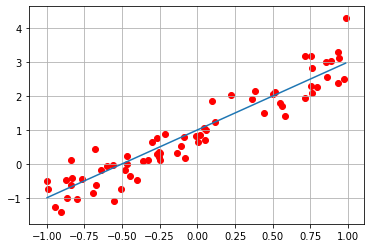

In [3]:
## grafico fit
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

In [4]:
##Costruisco il modello

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])           

In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs= 50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 700 samples, validate on 70 samples
Epoch 1/50
700/700 [==============================] - 1s 2ms/sample - loss: 2.4316 - mse: 2.4316 - val_loss: 2.0396 - val_mse: 2.0396
Epoch 2/50
700/700 [==============================] - 0s 136us/sample - loss: 1.6492 - mse: 1.6492 - val_loss: 1.4737 - val_mse: 1.4737
Epoch 3/50
700/700 [==============================] - 0s 195us/sample - loss: 1.1957 - mse: 1.1957 - val_loss: 1.1168 - val_mse: 1.1168
Epoch 4/50
700/700 [==============================] - 0s 148us/sample - loss: 0.9101 - mse: 0.9101 - val_loss: 0.8758 - val_mse: 0.8758
Epoch 5/50
700/700 [==============================] - 0s 95us/sample - loss: 0.7197 - mse: 0.7197 - val_loss: 0.7047 - val_mse: 0.7047
Epoch 6/50
700/700 [==============================] - 0s 79us/sample - loss: 0.5874 - mse: 0.5874 - val_loss: 0.5798 - val_mse: 0.5798
Epoch 7/50
700/700 [==============================] - 0s 74us/sample - loss: 0.4927 - mse: 0.4927 - val_loss: 0.4869 - val_mse: 0.4869
Epoch 8/

In [7]:
# return weights
model.get_weights()

[array([[1.9687793]], dtype=float32), array([0.9996881], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

70/70 [==============================] - 0s 209us/sample - loss: 0.1869 - mse: 0.1869

Test loss: 0.1869331087384905
Test accuracy: 0.18693312


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

70/70 [==============================] - 0s 133us/sample - loss: 3.6410e-04 - mse: 3.6410e-04

Test loss: 0.00036409638123586775
Test accuracy: 0.00036409637


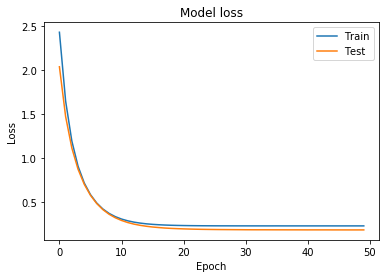

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

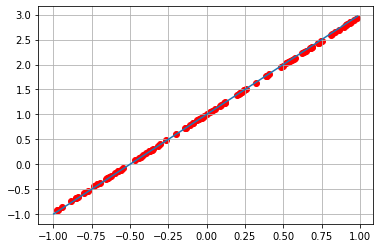

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

________________________________________________
##### Svolgimento
Per andare a fittare la funzione richiesta sono andato a creare una rete neurale a tre layers. Il motivo di questa scelta è dovuto al teorema di approssimazione universale. 

Ho quinti costruito la rete in questo modo: un layer di imput con singolo neurone, perché in entrata ho solo un numero reale. Poi uno "hidden" con 4 neuroni, ogni coppia di nuerone serviva a fittare una salit/discesa della funzione. L'ultimo layer di un neurone per l'output, perché la funzione ritorna in R. 

All'inizio i neurone del layer hidden erano 6, ma la rete non riesce ad imparare la salita intorno ad x = 1. Per fare questo bisognerebbe ampliare il range di campionamento. Ho ridotto a 4 i neuroni per migliorare i tempi di performance.

Come funzione di attivazione per il layer hidden ho scelto una funzione con platue, per via della forma della funzione. Ho osservato che l'ottimizzazione migliore avveniva con la funzione "tanh".

Di seguito viene mostrato l'ottimizzazione con $N_{trial} = 1000$, $N_{epochs} = 70$ e sigma = 0.2 . Ho usato pochi dati per evitare l'overfitting.

In [168]:
## preparo dati

# target parameters of f(x) = a + b*x + c*x^2 + d*x^3
a = 4
b = -3 
c = -2
d = 3


# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a + b*x_valid + c* x_valid*x_valid + d*x_valid*x_valid*x_valid # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b*x_train + c* x_train*x_train + d*x_train*x_train*x_train, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c* x_valid*x_valid + d*x_valid*x_valid*x_valid, sigma)

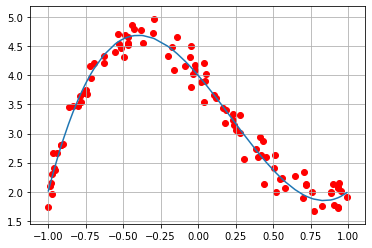

In [169]:
## grafico fit
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

In [170]:
##Costruisco il modello

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,))) #input 1
model.add(Dense(4, activation = 'tanh')) #hidden 4 -> 2* ogni salita/discesa (ho provato con 6 ma non cambia molto)
model.add(Dense(1)) #output 1

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])        



In [171]:
# get a summary of our composed model
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 5         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [172]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=70,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/70
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.3389 - mse: 4.3389 - val_loss: 0.8053 - val_mse: 0.8053
Epoch 2/70
1000/1000 [==============================] - 0s 108us/sample - loss: 0.6765 - mse: 0.6765 - val_loss: 0.4682 - val_mse: 0.4682
Epoch 3/70
1000/1000 [==============================] - 0s 65us/sample - loss: 0.3890 - mse: 0.3890 - val_loss: 0.4045 - val_mse: 0.4045
Epoch 4/70
1000/1000 [==============================] - 0s 74us/sample - loss: 0.2989 - mse: 0.2989 - val_loss: 0.3739 - val_mse: 0.3739
Epoch 5/70
1000/1000 [==============================] - 0s 74us/sample - loss: 0.2516 - mse: 0.2516 - val_loss: 0.3275 - val_mse: 0.3275
Epoch 6/70
1000/1000 [==============================] - 0s 73us/sample - loss: 0.2147 - mse: 0.2147 - val_loss: 0.2782 - val_mse: 0.2782
Epoch 7/70
1000/1000 [==============================] - 0s 65us/sample - loss: 0.1853 - mse: 0.1853 - val_loss: 0.2518 - val_mse: 0

In [173]:
# return weights
model.get_weights()

[array([[-1.8483679]], dtype=float32),
 array([-0.6371111], dtype=float32),
 array([[-1.4807323 ,  0.12656803, -0.36067155, -1.1530828 ]],
       dtype=float32),
 array([ 1.2670408 , -0.47816563,  0.451674  , -0.97856164], dtype=float32),
 array([[ 1.7495499 ],
        [-0.59529436],
        [ 0.5785027 ],
        [-2.0558095 ]], dtype=float32),
 array([1.1857522], dtype=float32)]

In [174]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 0s 66us/sample - loss: 0.0516 - mse: 0.0516

Test loss: 0.051553611010313034
Test accuracy: 0.05155361


In [175]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 0s 69us/sample - loss: 0.0200 - mse: 0.0200

Test loss: 0.019951107054948805
Test accuracy: 0.019951107


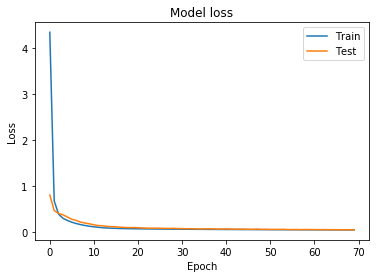

In [176]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

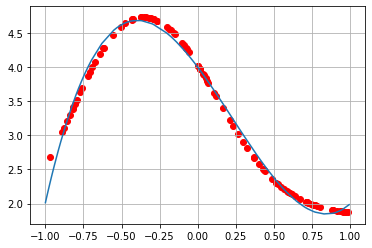

In [177]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

________________________________________________
##### Svolgimento
Per andare a fittare la funzione richiesta sono andato a creare una rete neurale a tre layers. Il motivo di questa scelta è dovuto al teorema di approssimazione universale. 

Ho quinti costruito la rete in questo modo: un layer di imput con due neuroni con input shape 2 per la coppia (x,y). In questo caso ho aumentato a due i nueroni essendo la funzione da R2->R . 
Poi uno "hidden" con 24 neuroni, ogni coppia di nuerone serviva a fittare una salit/discesa della funzione. Per come è fatta la funzione nel range di interesse si hanno 2 salite e 2 discese, all'inizio pensavo che bastassero quindi 16 neuroni (8 x 2, numero di varibili). Il fit non riusciva. Ho aumentato a 32 perché ho osservato che erano presenti una salita ed una discesa ai bordi(4x4) del dominio di interesse. Con 32 neuroni il fit funziona e la loss scende a valori di 0.008 (con sigma = 0).
L'ultimo layer di un neurone per l'output, perché la funzione ritorna in R. 

Come funzione di attivazione per il layer hidden dopo vari tentativi ho scelto la funzione **selu**.

Di seguito viene mostrato l'ottimizzazione con $N_{trial} = 20000$, $N_{epochs} = 50$ e sigma = 0.2 . Ho usato pochi dati per evitare l'overfitting.

In [194]:
## preparo dati

# generate training inputs
np.random.seed(0)

n_train = 20000
n_valid = 2000
# generate synthetic training dataset
x_train = np.random.uniform(-1.5, 1.5,(n_train, 2))
# generate synthetic validation data
x_valid = np.random.uniform(-1.5, 1.5,(n_valid, 2))

y_target = np.zeros(len(x_valid[:,0]))
y_train = np.zeros(len(x_train[:,0]))
y_valid = np.zeros(len(x_valid[:,0]))

for i in range(len(x_valid[:,0])):
    y_target[i] = math.sin(x_valid[i,0]*x_valid[i,0] + x_valid[i,1]*x_valid[i,1]) # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
for i in range(len(x_train)):
    y_train[i] = np.random.normal(math.sin(x_train[i,0]*x_train[i,0] + x_train[i,1]*x_train[i,1]), sigma) # actual measures from which we want to guess regression parameters
for i in range(len(x_valid)):    
    y_valid[i] = np.random.normal(math.sin(x_valid[i,0]*x_valid[i,0] + x_valid[i,1]*x_valid[i,1]), sigma)
    
    



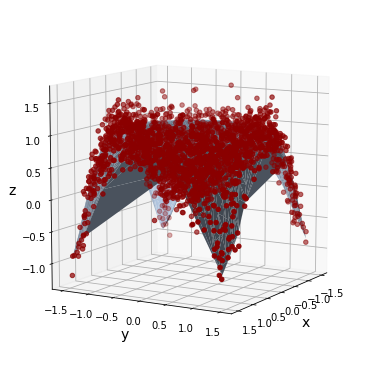

In [195]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(x_valid[:,0], x_valid[:,1], y_valid, color = 'darkred')
ax.plot_trisurf(x_valid[:,0], x_valid[:,1], y_target, color = "lightsteelblue")
ax.set_xlabel('x',fontsize= 14)
ax.set_ylabel('y',fontsize= 14)
ax.set_zlabel('z',fontsize= 14)
ax.view_init(10, 30)
plt.show()

In [196]:
##Costruisco il modello

model = Sequential()
# Adds to the model a densely-connected layer with 27 units with input shape 2, an (x,y) pair:
model.add(Dense(2, input_shape=(2,)))
model.add(Dense(32, activation='selu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])        

# get a summary of our composed model
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_59 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 33        
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


In [197]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 20000 samples, validate on 2000 samples
Epoch 1/50
20000/20000 [==============================] - 2s 102us/sample - loss: 0.1909 - mse: 0.1909 - val_loss: 0.1747 - val_mse: 0.1747
Epoch 2/50
20000/20000 [==============================] - 1s 62us/sample - loss: 0.1767 - mse: 0.1767 - val_loss: 0.1681 - val_mse: 0.1681
Epoch 3/50
20000/20000 [==============================] - 1s 62us/sample - loss: 0.1698 - mse: 0.1698 - val_loss: 0.1606 - val_mse: 0.1606
Epoch 4/50
20000/20000 [==============================] - 1s 62us/sample - loss: 0.1616 - mse: 0.1616 - val_loss: 0.1521 - val_mse: 0.1521
Epoch 5/50
20000/20000 [==============================] - 1s 63us/sample - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1437 - val_mse: 0.1437
Epoch 6/50
20000/20000 [==============================] - 1s 63us/sample - loss: 0.1437 - mse: 0.1437 - val_loss: 0.1351 - val_mse: 0.1351
Epoch 7/50
20000/20000 [==============================] - 1s 63us/sample - loss: 0.1366 - mse: 0.1366 - val_loss: 0.

In [198]:
# return weights
#model.get_weights()

In [199]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2000/2000 [==============================] - 0s 58us/sample - loss: 0.0495 - mse: 0.0495

Test loss: 0.04953419408202171
Test accuracy: 0.0495342


In [200]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2000/2000 [==============================] - 0s 51us/sample - loss: 0.0104 - mse: 0.0104

Test loss: 0.010388705413788557
Test accuracy: 0.010388705


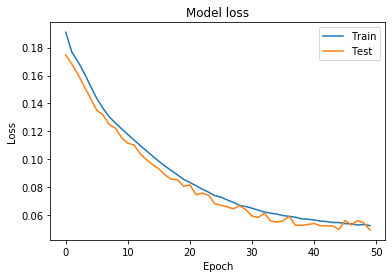

In [201]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

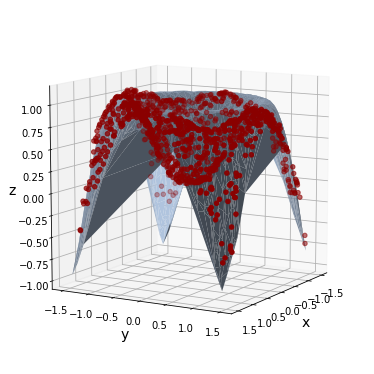

In [202]:
x_predicted = np.random.uniform(-1.5, 1.5, (1000,2))

y_predicted = model.predict(x_predicted)

fig = plt.figure(1, figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, color = 'darkred')
ax.plot_trisurf(x_valid[:,0], x_valid[:,1], y_target, color = "lightsteelblue")
ax.set_xlabel('x',fontsize= 14)
ax.set_ylabel('y',fontsize= 14)
ax.set_zlabel('z',fontsize= 14)
ax.view_init(10, 30)
plt.show()